In [1]:
import sys
sys.path.insert(1, '../')
from OUvAAxelrod import *
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
plt.style.use('fivethirtyeight')
seed = 128
np.random.seed(seed)

In [2]:
# if we want to run simulations with heterogenous populations - we need to set homogeneous to false, 
# and we have the option to set a value for M, E, and I for heterogenous populations (defaults are 1000, 0.1, 0.1 for homogenous)

# first number is median, second standard deviation
M = [1000, 0.00001]
E = [0.1, 0.2]
I = [0.1, 0.2]

# create a list of agents, default = 100
agents = get_agents(homogenous = False, number_of_agents = 100, M = M, E = E, I = I)

In [3]:
check_parameters(agents, M, E, I)

AGENTS PARAMETERS IN POPULATION
------------------------------
   M 		  E 	   I
------------------------------
| 1000.0 	 0.34 	 0.46 |
| 1000.0 	 0.08 	 0.19 |
| 1000.0 	 0.17 	 0.33 |
| 1000.0 	 0.2 	 0.06 |
| 1000.0 	 0.05 	 0.04 |
| 1000.0 	 0.16 	 0.1 |
| 1000.0 	 0.34 	 0.0 |
| 1000.0 	 0.51 	 0.06 |
| 1000.0 	 0.13 	 0.09 |
| 1000.0 	 0.03 	 0.0 |
| 1000.0 	 0.2 	 0.06 |
| 1000.0 	 0.05 	 0.14 |
| 1000.0 	 0.08 	 0.42 |
| 1000.0 	 0.02 	 0.21 |
| 1000.0 	 0.25 	 0.39 |
| 1000.0 	 0.36 	 0.25 |
| 1000.0 	 0.09 	 0.41 |
| 1000.0 	 0.36 	 0.3 |
| 1000.0 	 0.02 	 0.43 |
------------------------------
The s.d. of M is: 0.0
The s.d. of E is: 0.14
The s.d. of I is: 0.15
------------------------------
The mean of M is: 1000.0
The mean of E is: 0.23
The mean of I is: 0.2
------------------------------
The population s.d. parameters entered were: 1e-05, 0.2, 0.2


In [4]:
tournament_seed128_mm1000_me01_mi01_sdm0_sde02_sdi02 = Tournament.create_play_tournament(
                 countries = agents, 
                 max_rounds = 100000, 
                 strategy_list = [defect, tit_for_tat, generous_tit_for_tat, cooperate], 
                 payoff_functions = default_payoff_functions, 
                 surveillance_penalty = True,
                 self_reward = selfreward, #default function
                 playing_each_other = True,
                 nr_strategy_changes = 1,
                 mutation_rate = 0.1,
                 init_fitnes_as_m = False,
                 noise = 0.05,
                 )

Tournament has started...
Tournament has ended. The simulation took 113 minutes.


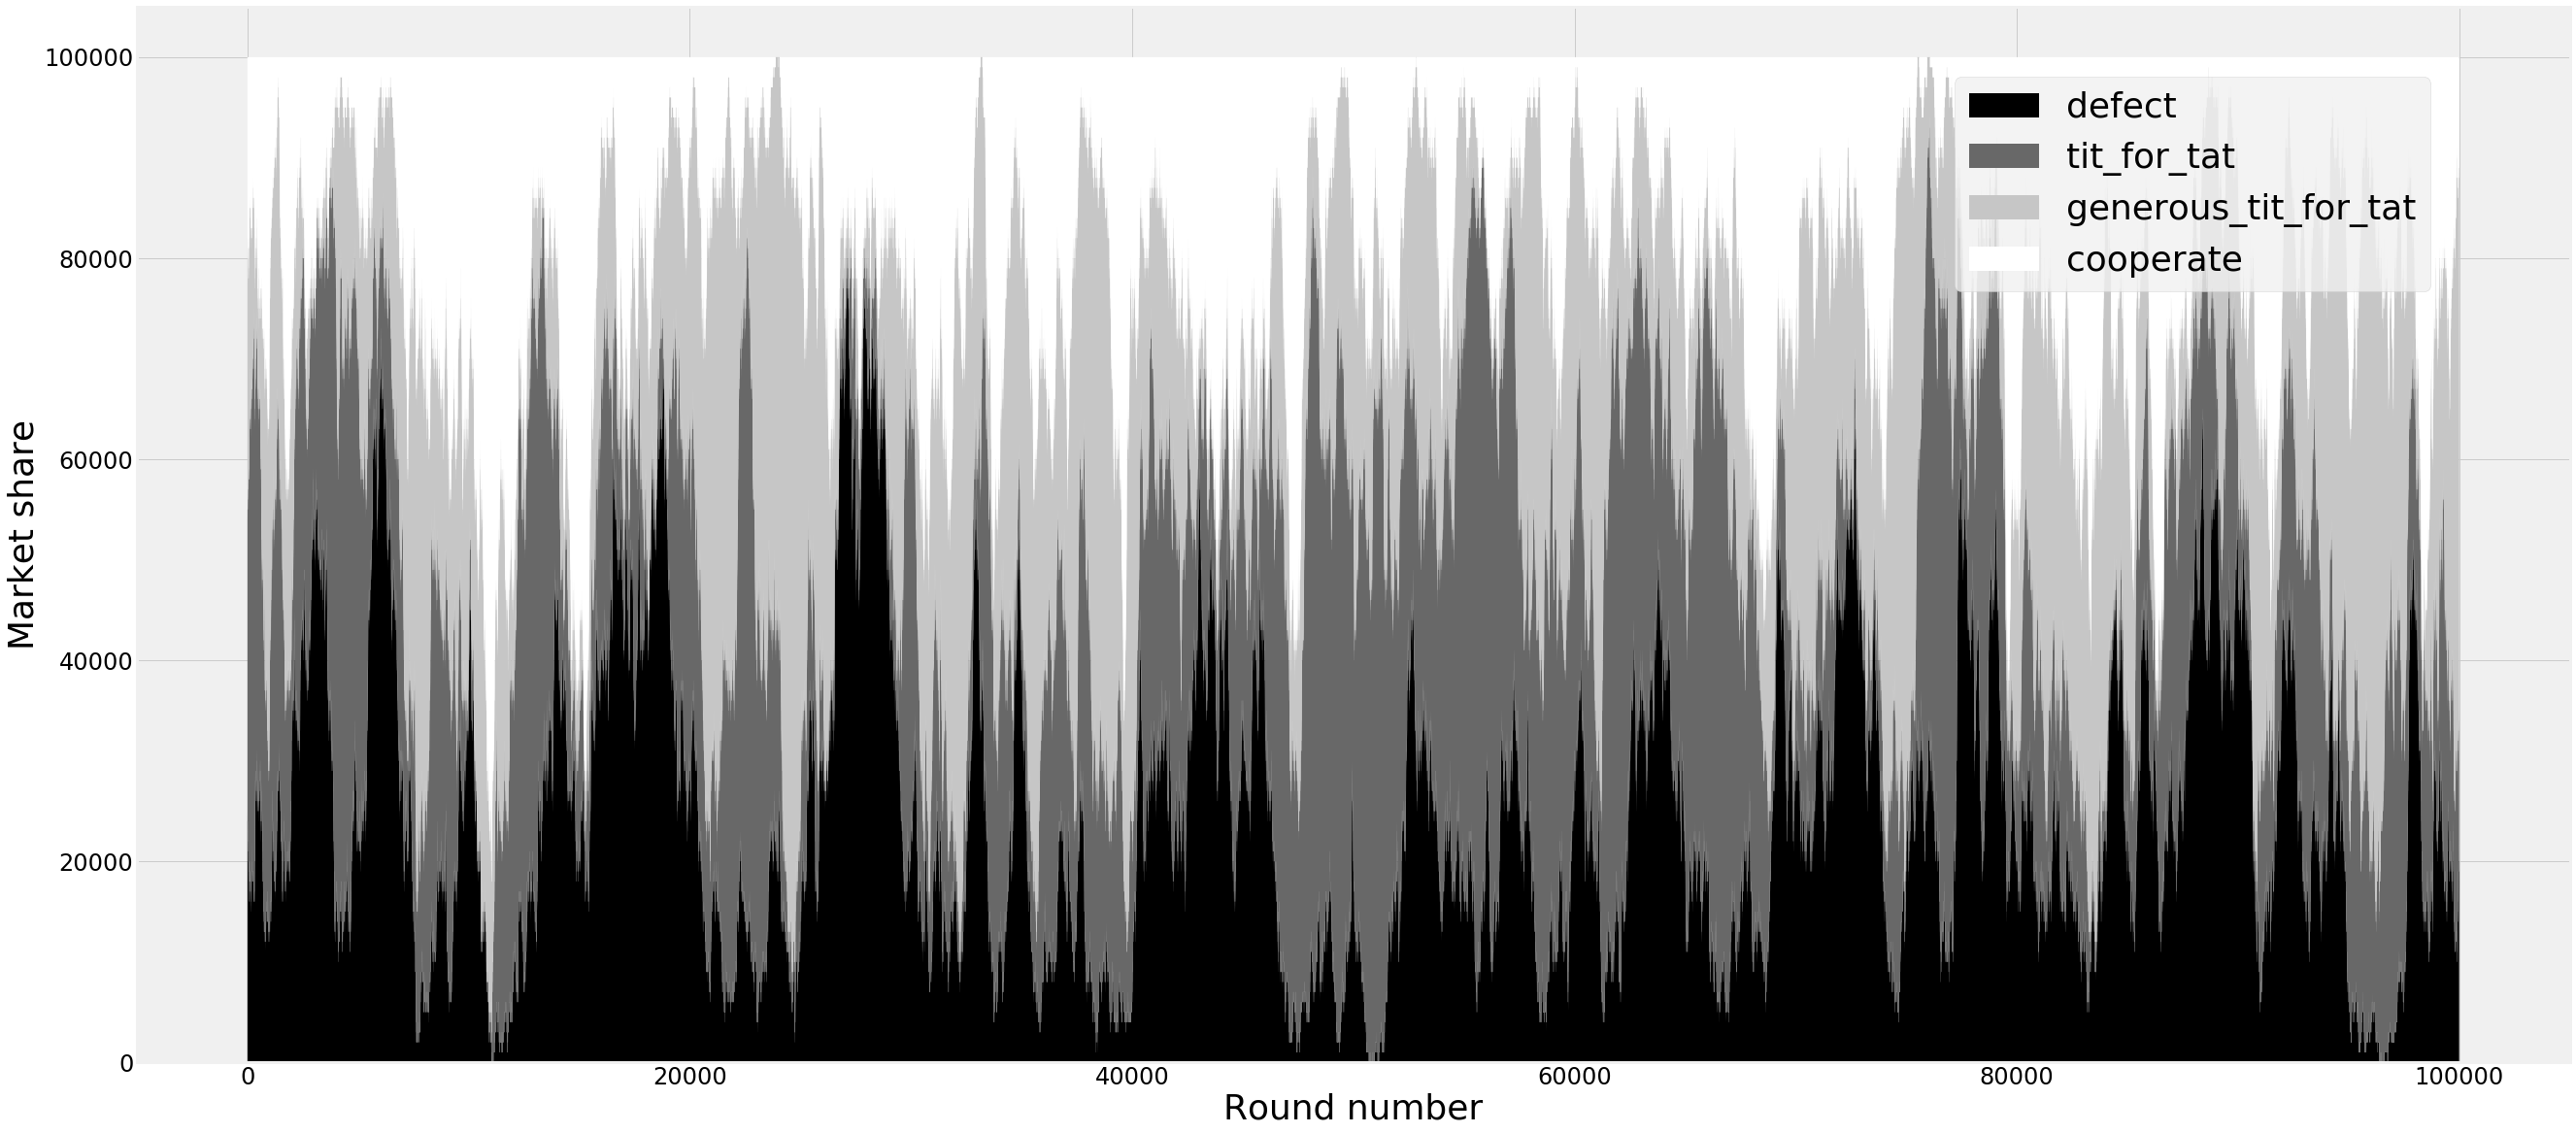

In [5]:
draw_stack(tournament_seed128_mm1000_me01_mi01_sdm0_sde02_sdi02)

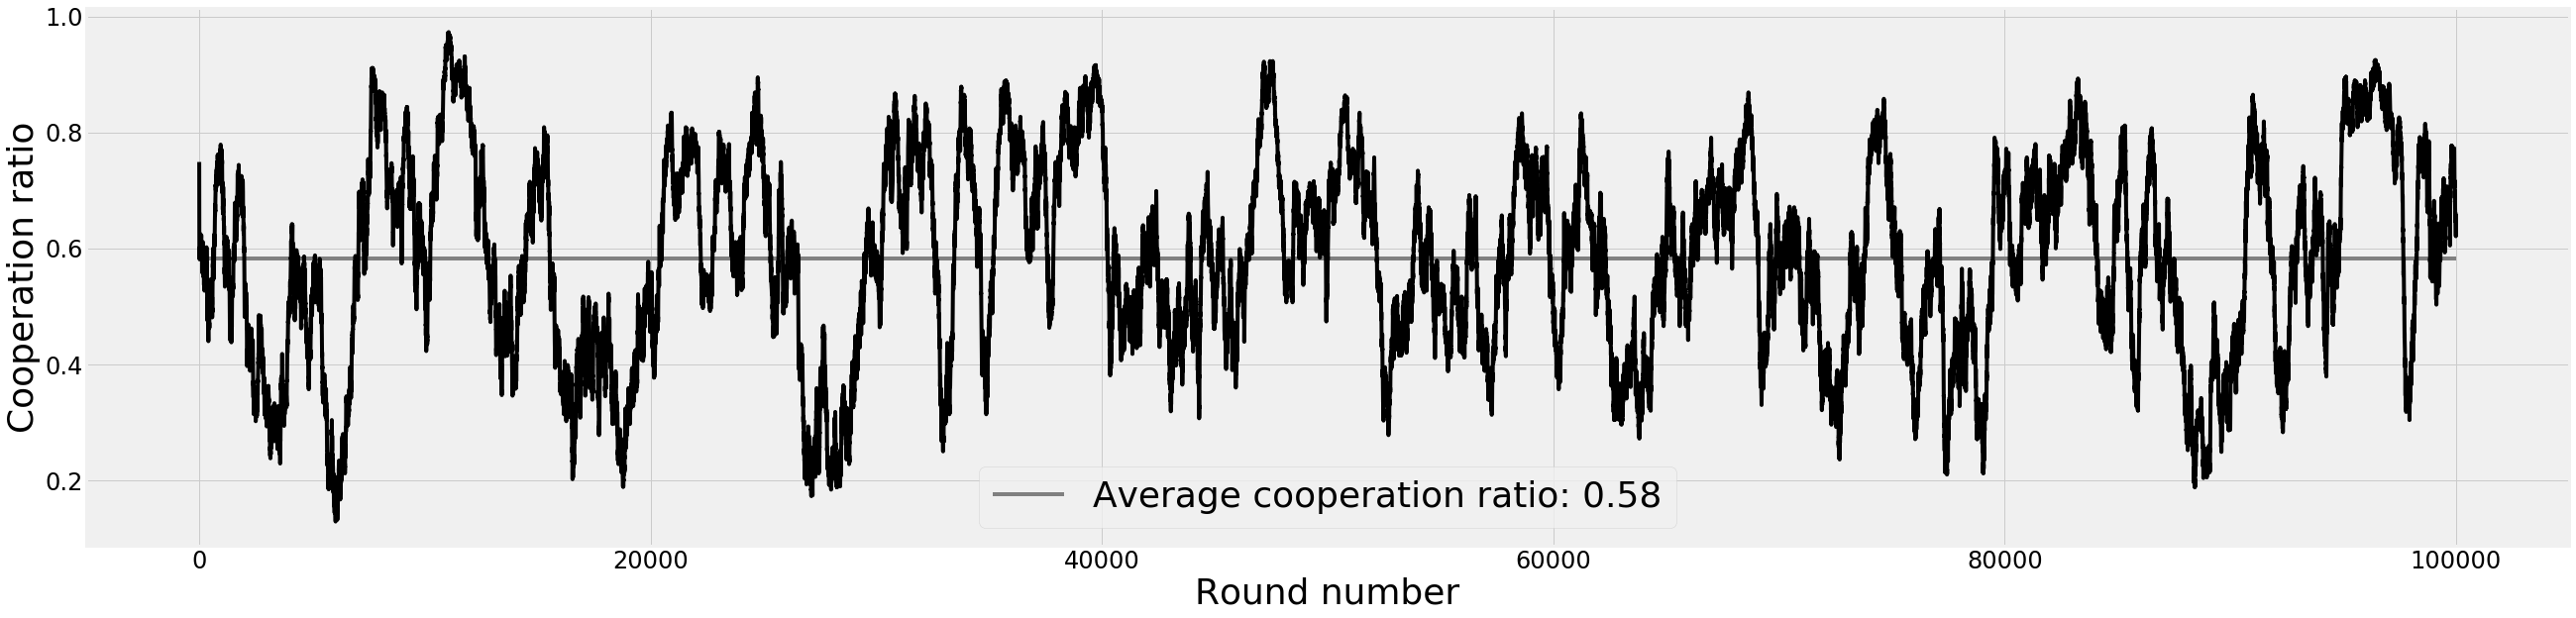

In [6]:
C_D_ratios_per_round(tournament_seed128_mm1000_me01_mi01_sdm0_sde02_sdi02)

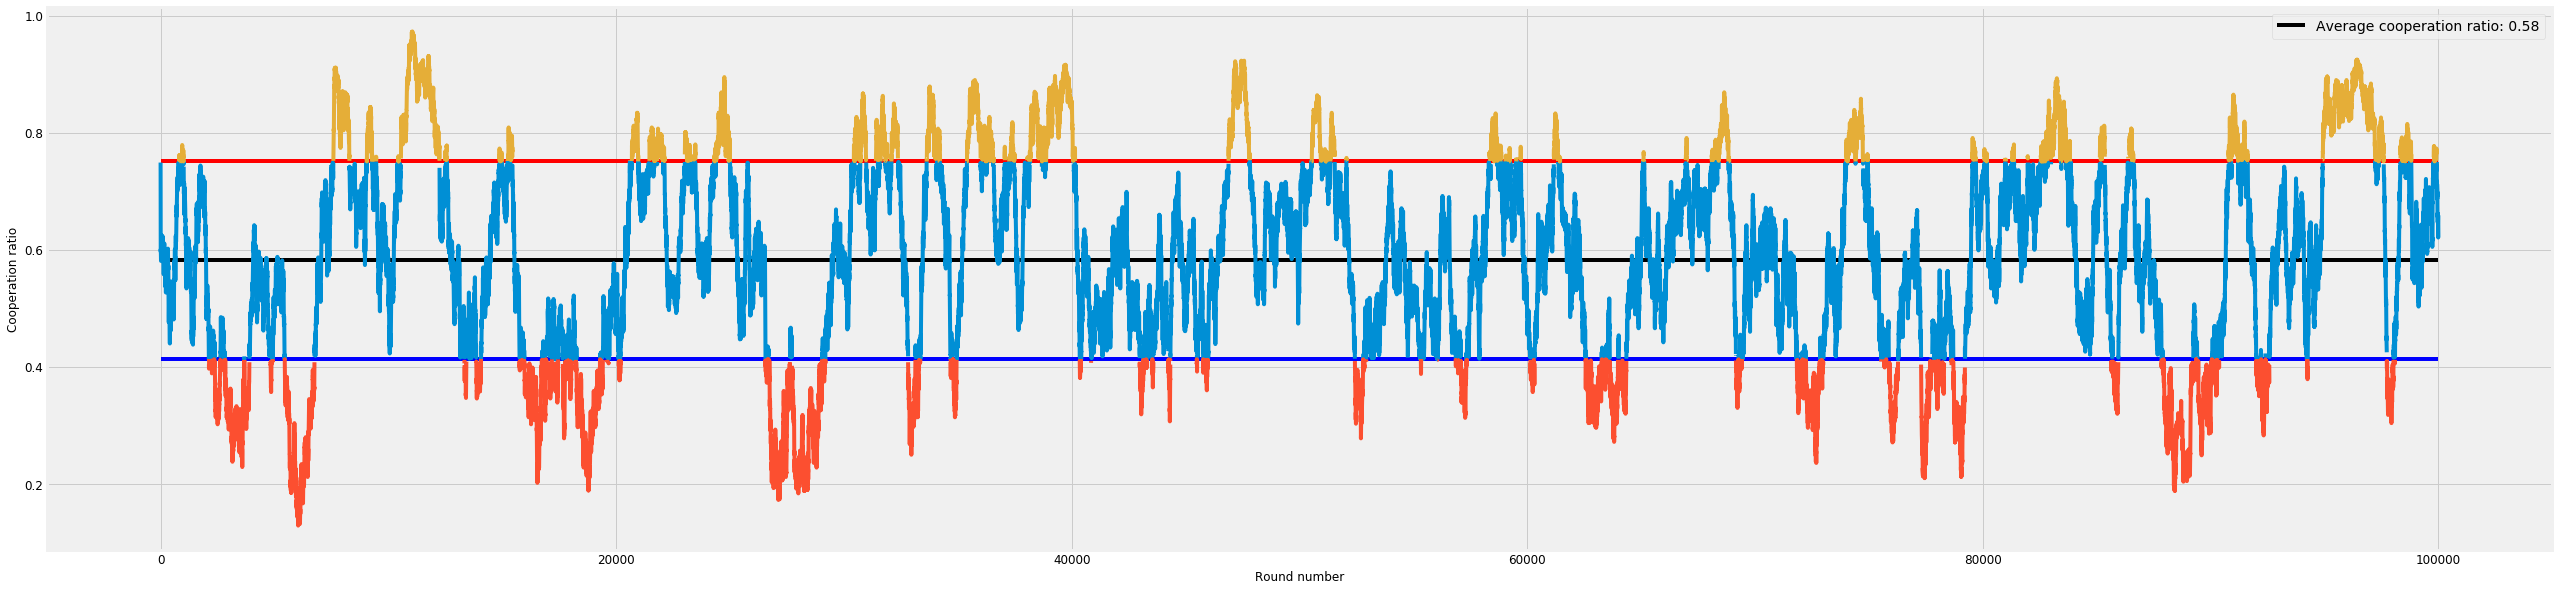

In [7]:
# we can change the constant of s.d.
C_D_ratios_per_round_var(tournament_seed128_mm1000_me01_mi01_sdm0_sde02_sdi02, constant = 1)

In [8]:
outliers = count_outliers(tournament_seed128_mm1000_me01_mi01_sdm0_sde02_sdi02, constants = np.arange(0.5, 3.1, 0.1))
data = {'S.D.': list(outliers.keys()), 'Counts': list(outliers.values())}
df = pd.DataFrame.from_dict(data)
print(df)
df.to_csv("Data/data__seed128_mm1000_me01_mi01_sdm0_sde02_sdi02_outlier_counts.csv", encoding='utf-8', index = False, float_format='%.1f')

    S.D.  Counts
0    0.5     779
1    0.6     735
2    0.7     718
3    0.8     735
4    0.9     708
5    1.0     639
6    1.1     563
7    1.2     593
8    1.3     493
9    1.4     396
10   1.5     364
11   1.6     326
12   1.7     215
13   1.8     165
14   1.9     152
15   2.0      96
16   2.1     113
17   2.2      66
18   2.3      38
19   2.4       9
20   2.5       9
21   2.6       4
22   2.7       0
23   2.8       0
24   2.9       0
25   3.0       0


In [9]:
save_cooperate_csv(tournament_seed128_mm1000_me01_mi01_sdm0_sde02_sdi02, type_of_tournament= "seed128_mm1000_me01_mi01_sdm0_sde02_sdi02", seed = str(seed))